In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

data = pd.read_csv("Gender Classification.csv") # Reading in the Gender Classification dataset as a pandas DataFrame object

## Data
It is important to note that for this model, the dataset was modified to cleary separate the genders. More specifically, the gender column in the dataset was sorted alphabetically in order to easily focus on the female features.

In [64]:
data #looking at the data

,long_hair,Forehead Width (cm),Forehead Height (cm),nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,0,14.0,5.4,0,0,1,0,Female
1,1,13.5,5.9,0,0,0,0,Female
2,0,13.0,5.2,0,0,0,0,Female
3,1,11.9,5.4,1,0,1,1,Female
4,1,12.1,5.4,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,12.1,6.2,1,1,1,1,Male
4997,1,14.1,7.0,1,1,1,1,Male
4998,1,12.9,7.0,1,1,1,1,Male
4999,1,12.3,6.9,0,1,1,1,Male


----------------------------------------------------------------------------------------------------------------------------------------------------------
Since we have already manipulated the dataset to distinguish the genders, we will only focus on the first 100 values of gender, that is, the females. Moreover, we will be considering their forehead width as the input (X), and the targets will be their forehead height (y).

In [65]:
X = data.iloc[0:100]["Forehead Width (cm)"]  # storing the desired feature measurement of the first 50 females in X
y = data.iloc[0:100]["Forehead Height (cm)"] # storing the desired gender label of the first 50 females in y

Let's see a visualization of this data, and see if there is a way to approximate the forehead height as a function of the forehead width.

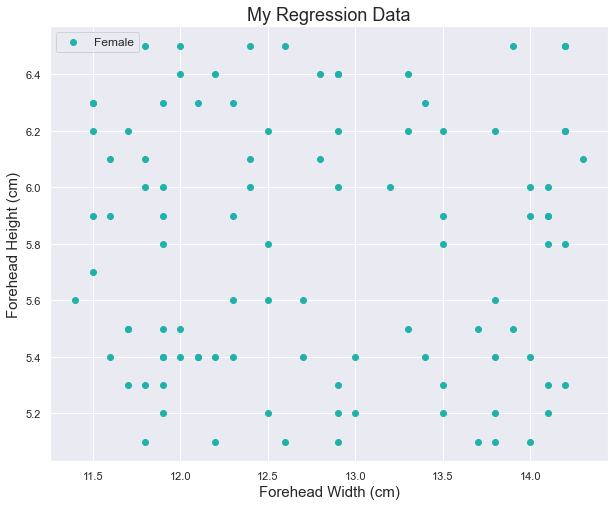

In [66]:
plt.figure(figsize = (10, 8))
plt.scatter(X,
            y,
            color = "lightseagreen",
            label = "Female")
        
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.legend(fontsize = 12)
plt.title("My Regression Data", fontsize = 18)
plt.show()

Looking at the plot above, it is not clear if there is a way to approximate the forehead height as a function of the forehead width. However, if there is a line that can cut through all the data (in a linearly regressable way), then we may have a rough approximation (target fuction) of the females forehead height based on their forehead width measurements.  

----------------------------------------------------------------------------------------------------------------------------------------------------------
Moving forward, we must recall that the choice of activation function determines what the model will do, such as classification or regression, in relation with the problem or task we are trying to answer or complete, respectively. 

In this case, since we are trying to predict a linear fucntion, we will use a linear activation function. Additionally, we will use the Mean Squared Error cost function. 

![Mean Square Error](https://www.google.com/search?q=mean+squared+error+cost+activation+function&tbm=isch&ved=2ahUKEwja7fjIv8f3AhVEVTUKHSd8DcoQ2-cCegQIABAA&oq=mean+squared+error+cost+activation+function&gs_lcp=CgNpbWcQA1DqBVjhXWCIX2gAcAB4AIABUogBuw6SAQIzMJgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=D09zYpqqHsSq1QGn-LXQDA&bih=750&biw=1536&rlz=1C1VDKB_enUS972US972)

In [67]:
class Single_Neuron(object): # class used to represent a single artificial neuron. 
       
    def __init__(self, activation_function): # method used for intialization of data member(s) -- In this case, self and activation function
        self.activation_function = activation_function

    """"
    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 
    """    
    
    
    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.weights = np.random.rand(1 + X.shape[1]) # weights intialized to be random
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.weights[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.weights[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.weights[:-1]) + self.weights[-1]
        return self.activation_function(preactivation)
    
    """
    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """

We weill now convert of X and y into numpy arrays. 

NOTE: the reshape method needs to be called anytime a feature vector with ONE measurement per entiry. X needs to be converted into a column vector representation.

In [68]:
X = X.values
X = X.reshape(-1, 1)
y = y.values

Lets look at the plot to verify that the data is formatted correctly 

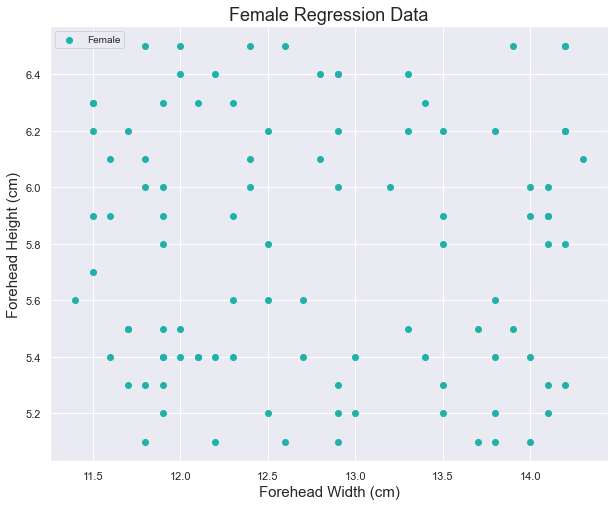

In [62]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Female")
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.title("Female Regression Data", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

As seen above, the data points in this plot match those in the first plot further above!

----------------------------------------------------------------------------------------------------------------------------------------------------------
With the newly formatted data, X and y, we now need to instantiate the Single Neuron class, and train it by calling the train method!

NOTE: to do this, we must pass it a function, and we will pass it the linear activation function as seen below.

In [70]:
def linear_activation(z): #defining the activation function
    return z

node = Single_Neuron(linear_activation) # instantiating the class by passing in the activation function and assigning it the variable node
node.train(X, y, alpha = 0.0001, epochs = 5)

Lets see a visualization of the prediction

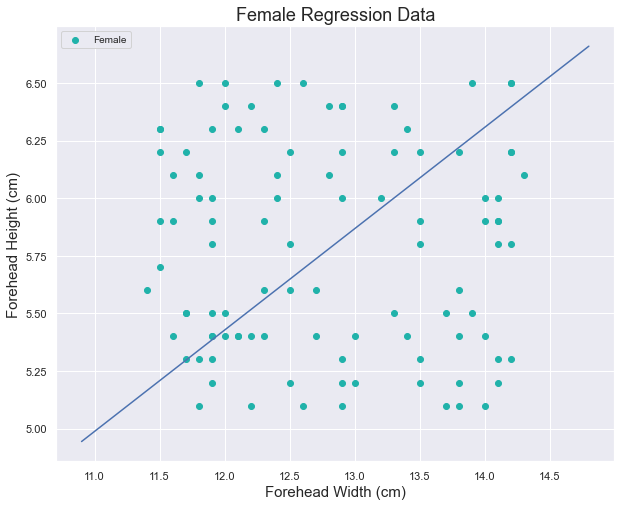

In [73]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100) 


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Female")
plt.plot(domain, node.predict(domain.reshape(-1, 1))) # domain has to be reshaped into a column vector
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.title("Female Regression Data", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

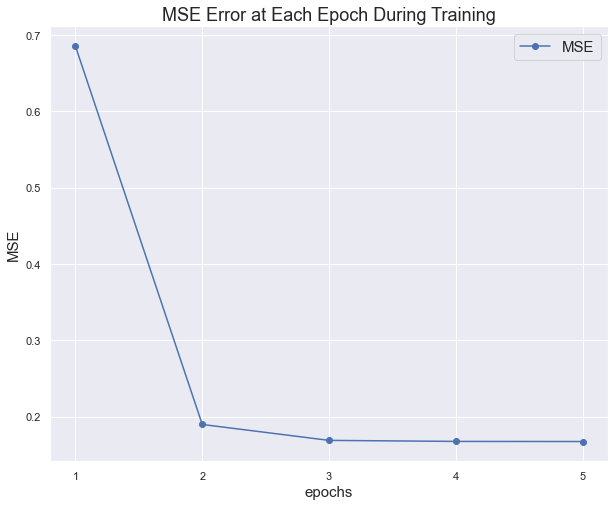

In [46]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

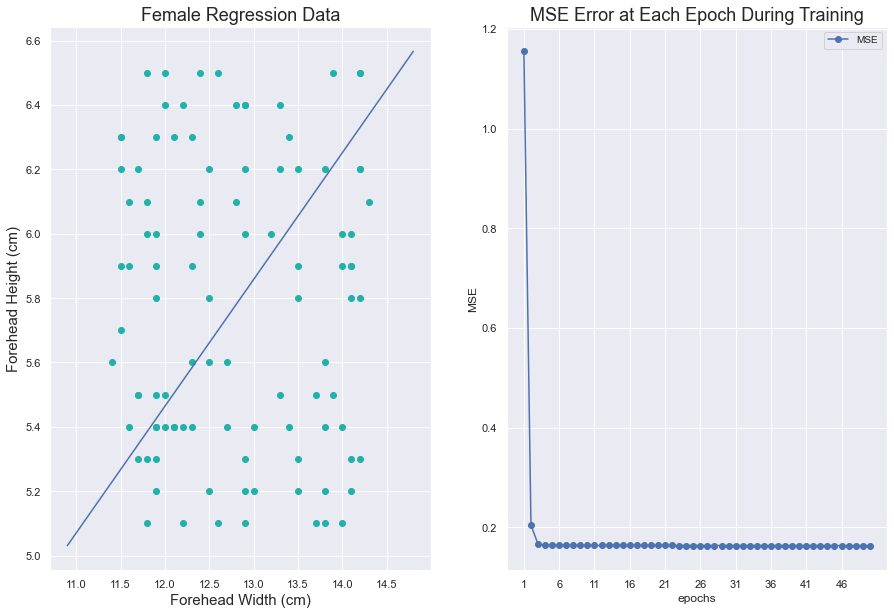

In [47]:
node = Single_Neuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Forehead Width (cm)", fontsize = 15)
ax1.set_ylabel("Forehead Height (cm)", fontsize = 15)
ax1.set_title("Female Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

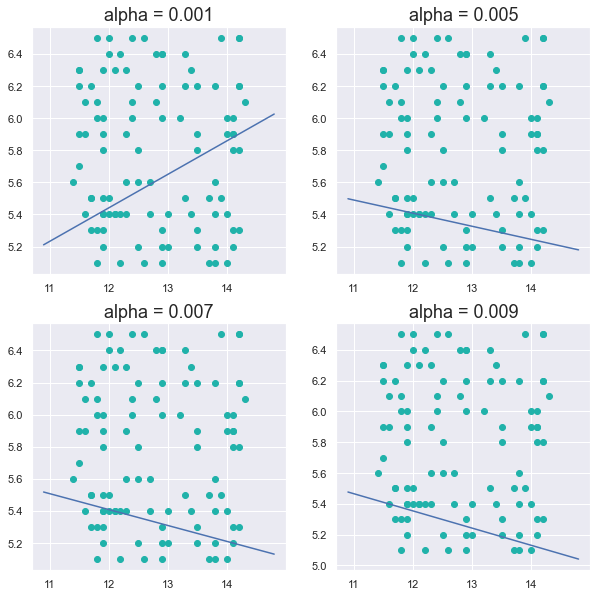

In [48]:
# Possible choices of learning rate 
alphas = [0.001, 0.005, 0.007, 0.009]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = Single_Neuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

Based on the results above, the alpha of 0.001 is the most suitable for this dataset. 